
1. **Pixel value**
    1. 객체 영역(bbox) 평균 pixel value
    2. 객체 영역을 제외한 배경(background) 평균 pixel value


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import json

In [2]:
data = pd.read_csv('../data(05_19).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58062 entries, 0 to 58061
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   imagePath  58062 non-null  object 
 1   label      58062 non-null  object 
 2   Shape_num  58062 non-null  int64  
 3   point1_x   58062 non-null  float64
 4   point1_y   58062 non-null  float64
 5   point2_x   58062 non-null  float64
 6   point2_y   58062 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
data.values[0]

array(['3403540', 'pack', 1, 926.446624, 1682.1, 1247.866464, 2283.751008],
      dtype=object)

In [3]:
path = "E:/reusable-trash-images/selectstar-reusable-trash-image/"
image_path = path + data.values[0][0] + ".jpg"
print(image_path,data.values[0][0])
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


E:/reusable-trash-images/selectstar-reusable-trash-image/3403540.jpg 3403540


In [4]:
image.shape

(4032, 2272, 3)

### bbox-pixel-mean

926 1682 1247 2283
(601, 321, 3)


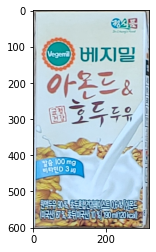

In [33]:
x = int(data.values[0][3])
y = int(data.values[0][4])
w = int(data.values[0][5])
h = int(data.values[0][6])
temp = image[y:h,x:w]
print(x,y,w,h)
print(temp.shape)
plt.imshow(temp)
plt.show()

In [15]:
temp = temp.reshape(temp.shape[0]*temp.shape[1],3)
temp.shape

(192921, 3)

In [23]:
np.average(temp,axis=0).round().astype(np.int32)

array([173, 191, 198])

In [153]:
image.shape

(4032, 2272, 3)

In [245]:
image[0][0]

array([172, 169, 164], dtype=uint8)

In [285]:
image[y:h,x:w]=-1

np.average(image[image[:,:,:]!=255].reshape(-1,3),axis=0).round().astype(np.int32)

array([169, 164, 158])

In [124]:
print((w-x)*(h-y))

192921


In [3]:
error_list = []

In [11]:
bBoxMeanR = []
bBoxMeanG = []
bBoxMeanB = []
eBoxMeanR = []
eBoxMeanG = []
eBoxMeanB = []
for i in range(50001,55001):
    try:
        path = "E:/reusable-trash-images/selectstar-reusable-trash-image/"
        image_path = path + data.values[i][0] + ".jpg"
        print(f"{i}번째")
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        x = int(data.values[0][3])
        y = int(data.values[0][4])
        w = int(data.values[0][5])
        h = int(data.values[0][6])
        roi = image[y:h,x:w]
        roi = roi.reshape(roi.shape[0]*roi.shape[1],3)
        temp = np.average(roi,axis=0).round().astype(np.int32)
        image[y:h,x:w]=256
        e_temp = np.average(image[image[:,:,:]!=256].reshape(-1,3),axis=0).round().astype(np.int32)
        bBoxMeanR.append(temp[0])
        bBoxMeanG.append(temp[1])
        bBoxMeanB.append(temp[2])
        eBoxMeanR.append(e_temp[0])
        eBoxMeanG.append(e_temp[1])
        eBoxMeanB.append(e_temp[2])
    except:
        error_list.append(data.values[i][0])

50001번째


C:\Users\smhrd\AppData\Local\Temp\ipykernel_2336\2692039421.py:21: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  image[y:h,x:w]=256


50002번째
50003번째
50004번째
50005번째
50006번째
50007번째
50008번째
50009번째
50010번째
50011번째
50012번째
50013번째
50014번째
50015번째
50016번째
50017번째
50018번째
50019번째
50020번째
50021번째
50022번째
50023번째
50024번째
50025번째
50026번째
50027번째
50028번째
50029번째
50030번째
50031번째
50032번째
50033번째
50034번째
50035번째
50036번째
50037번째
50038번째
50039번째
50040번째
50041번째
50042번째
50043번째
50044번째
50045번째
50046번째
50047번째
50048번째
50049번째
50050번째
50051번째
50052번째
50053번째
50054번째
50055번째
50056번째
50057번째
50058번째
50059번째
50060번째
50061번째
50062번째
50063번째
50064번째
50065번째
50066번째
50067번째
50068번째
50069번째
50070번째
50071번째
50072번째
50073번째
50074번째
50075번째
50076번째
50077번째
50078번째
50079번째
50080번째
50081번째
50082번째
50083번째
50084번째
50085번째
50086번째
50087번째
50088번째
50089번째
50090번째
50091번째
50092번째
50093번째
50094번째
50095번째
50096번째
50097번째
50098번째
50099번째
50100번째
50101번째
50102번째
50103번째
50104번째
50105번째
50106번째
50107번째
50108번째
50109번째
50110번째
50111번째
50112번째
50113번째
50114번째
50115번째
50116번째
50117번째
50118번째
50119번째
50120번째
50121번째
50122번째
50123번째
50124번째
50125번째
50126번째


c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\smhrd\AppData\Local\Temp\ipykernel_2336\2692039421.py:20: RuntimeWarning: invalid value encountered in cast
  temp = np.average(roi,axis=0).round().astype(np.int32)


50636번째
50637번째
50638번째
50639번째
50640번째
50641번째
50642번째
50643번째
50644번째
50645번째
50646번째
50647번째
50648번째
50649번째
50650번째
50651번째
50652번째
50653번째
50654번째
50655번째
50656번째
50657번째
50658번째
50659번째
50660번째
50661번째
50662번째
50663번째
50664번째
50665번째
50666번째
50667번째
50668번째
50669번째
50670번째
50671번째
50672번째
50673번째
50674번째
50675번째
50676번째
50677번째
50678번째
50679번째
50680번째
50681번째
50682번째
50683번째
50684번째
50685번째
50686번째
50687번째
50688번째
50689번째
50690번째
50691번째
50692번째
50693번째
50694번째
50695번째
50696번째
50697번째
50698번째
50699번째
50700번째
50701번째
50702번째
50703번째
50704번째
50705번째
50706번째
50707번째
50708번째
50709번째
50710번째
50711번째
50712번째
50713번째
50714번째
50715번째
50716번째
50717번째
50718번째
50719번째
50720번째
50721번째
50722번째
50723번째
50724번째
50725번째
50726번째
50727번째
50728번째
50729번째
50730번째
50731번째
50732번째
50733번째
50734번째
50735번째
50736번째
50737번째
50738번째
50739번째
50740번째
50741번째
50742번째
50743번째
50744번째
50745번째
50746번째
50747번째
50748번째
50749번째
50750번째
50751번째
50752번째
50753번째
50754번째
50755번째
50756번째
50757번째
50758번째
50759번째
50760번째


In [105]:
data[data['imagePath']=='3408934']

,imagePath,label,Shape_num,point1_x,point1_y,point2_x,point2_y
1000,3408934,plastic,3,1181.249244,2217.600000,1436.399244,2469.600000
1001,3408934,can,3,1077.301134,1782.901008,1351.350378,2142.001008
1002,3408934,can,3,711.899118,2069.551008,1401.749874,2812.951008


In [155]:
data.values[2999]

array(['3415073', 'plastic', 2, 1370.2496219999998, 1590.752016,
       1615.9488659999995, 1949.852016], dtype=object)

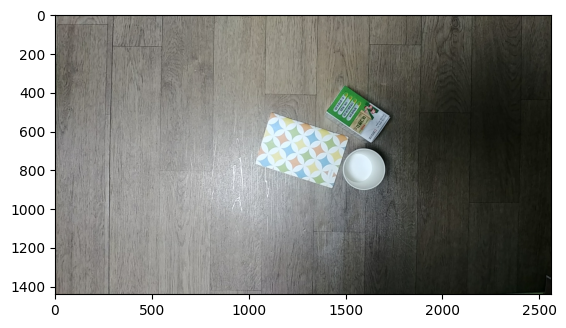

In [163]:
path = "E:/reusable-trash-images/selectstar-reusable-trash-image/"
image_path = path + data.values[6000][0] + ".jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [179]:
data = pd.read_csv("../data(05_22).csv", index_col=False)
data

C:\Users\smhrd\AppData\Local\Temp\ipykernel_2336\4236346271.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data(05_22).csv", index_col=False)


,imagePath,label,Shape_num,point1_x,point1_y,point2_x,point2_y,AllPixelMeanR,AllPixelMeanG,AllPixelMeanB,bBoxMeanR,bBoxMeanG,bBoxMeanB,eBoxMeanR,eBoxMeanG,eBoxMeanB
0,3403540,pack,1,926.446624,1682.100000,1247.866464,2283.751008,169,164,159,173,191,198,165,160,155
1,3403580,pack,2,920.144096,1543.500000,1462.147872,1968.751008,166,161,154,170,183,187,162,157,150
2,3403580,pack,2,891.782720,1890.002016,1317.192000,2447.551008,166,161,154,170,183,187,162,157,150
3,3403658,can,1,998.923424,1701.000000,1295.133152,2223.902016,167,161,157,178,144,157,163,158,153
4,3403788,glass,1,1434.782922,972.086083,2672.409305,1184.842661,166,162,154,163,156,147,163,159,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58057,t3_0029,can,6,721.000000,375.000000,967.000000,665.000000,91,90,94,87,82,85,91,90,94
58058,t3_0029,pack,6,591.000000,356.000000,831.000000,573.000000,91,90,94,87,82,85,91,90,94
58059,t3_0029,glass,6,451.000000,508.000000,869.000000,767.000000,91,90,94,87,82,85,91,90,94
58060,t3_0030,pet,2,706.000000,555.000000,859.000000,949.000000,110,111,113,104,107,104,110,111,113


In [259]:
list2 = []
list3 =[]

In [243]:
type(data.values[0][0])

int

---------
---------
---------
---------
---------
---------
---------
---------
---------
---------
---------
---------
---------
---------
---------
---------


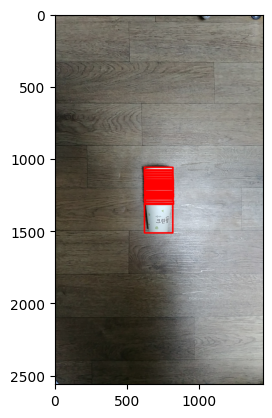

In [262]:
imagePath = 'E:/reusable-trash-images/selectstar-reusable-trash-image/3435746.jpg'
image = cv2.imread(imagePath, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
temp_list = data[data['imagePath']==3435746]
list1 = temp_list.values
for i in list1:
    x = int(i[3])
    y = int(i[4])
    w = int(i[5])
    h = int(i[6])
    cv2.rectangle(image,(x,y),(w,h),255,10)
    roi = image[y:h,x:w]
    roi = roi.reshape(roi.shape[0]*roi.shape[1],3)
    temp = np.average(roi,axis=0).round().astype(np.int32)
    print("---------")
    list2.append((temp[0],temp[1],temp[2]))
plt.imshow(image)
plt.show()

In [263]:
print(len(list2))
for i in list2:
    print(i)

16
(186, 171, 176)
(235, 113, 115)
(245, 60, 61)
(245, 60, 61)
(245, 60, 61)
(245, 60, 61)
(245, 60, 61)
(247, 48, 48)
(246, 49, 50)
(251, 19, 20)
(241, 67, 69)
(243, 58, 59)
(245, 48, 49)
(244, 47, 49)
(243, 47, 48)
(249, 17, 18)


In [162]:
path = "E:/reusable-trash-images/selectstar-reusable-trash-image/"
image_path = path + data.values[6000][0] + ".jpg"
print(f"{i}번째")
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
x = int(data.values[0][3])
y = int(data.values[0][4])
w = int(data.values[0][5])
h = int(data.values[0][6])
roi = image[y:h,x:w]
roi = roi.reshape(roi.shape[0]*roi.shape[1],3)
temp = np.average(roi,axis=0).round().astype(np.int32)
image[y:h,x:w]=256
e_temp = np.average(image[image[:,:,:]!=256].reshape(-1,3),axis=0).round().astype(np.int32)
# bBoxMeanR.append(temp[0])
# bBoxMeanG.append(temp[1])
# bBoxMeanB.append(temp[2])
# eBoxMeanR.append(e_temp[0])
# eBoxMeanG.append(e_temp[1])
# eBoxMeanB.append(e_temp[2])
print(temp[0])
print(temp[1])
print(temp[2])
print(e_temp[0])
print(e_temp[1])
print(e_temp[2])




55000번째
-2147483648
-2147483648
-2147483648
110
111
105


c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\smhrd\AppData\Local\Temp\ipykernel_2336\27547935.py:12: RuntimeWarning: invalid value encountered in cast
  temp = np.average(roi,axis=0).round().astype(np.int32)
C:\Users\smhrd\AppData\Local\Temp\ipykernel_2336\27547935.py:13: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  image[y:h,x:w]=256


In [12]:
print(len(bBoxMeanR))
print(len(bBoxMeanG))
print(len(bBoxMeanB))
print(len(eBoxMeanR))
print(len(eBoxMeanG))
print(len(eBoxMeanB))

5000
5000
5000
5000
5000
5000


In [13]:
df_temp = pd.DataFrame({
    "bBoxMeanR":bBoxMeanR,
    "bBoxMeanG":bBoxMeanG,
    "bBoxMeanB":bBoxMeanB,
    "eBoxMeanR":eBoxMeanR,
    "eBoxMeanG":eBoxMeanG,    
    "eBoxMeanB":eBoxMeanB,
    })
df_temp.to_csv("./box17.csv", index=False)


In [35]:
data_test = pd.read_csv("./box11.csv")
data_test[data_test["bBoxMeanB"]==-2147483648]

,bBoxMeanR,bBoxMeanG,bBoxMeanB,eBoxMeanR,eBoxMeanG,eBoxMeanB
809,-2147483648,-2147483648,-2147483648,133,127,115
810,-2147483648,-2147483648,-2147483648,133,127,115
1368,-2147483648,-2147483648,-2147483648,154,138,124
1369,-2147483648,-2147483648,-2147483648,154,138,124
1706,-2147483648,-2147483648,-2147483648,121,108,94
1707,-2147483648,-2147483648,-2147483648,121,108,94
1708,-2147483648,-2147483648,-2147483648,121,108,94
1709,-2147483648,-2147483648,-2147483648,121,108,94
1713,-2147483648,-2147483648,-2147483648,132,121,110
1714,-2147483648,-2147483648,-2147483648,132,121,110
